 <img src="./markdown/reco.jpg" alt="Recommendation system" style="display: block;
  margin-left: auto;
  margin-right: auto;
  width: 80%;height:350px"> 

<h1 style="text-align:center;font-size:35px;">Recipe recommendation system</h1>
<br>

<h1 style="font-size:30px;color:#008abc;">Introduction</h1>

#### The goal of this project is to ultimately create a personalized recipe recommendation system that learns from the choice of its users. 
##### Data source and fields explanation:https://data.world/atlas-query/cookbook


##### Due to feasibility limitations, the recommender system will not be able to track users` preferences so that we will come up with a new goal.

## Healthy recommender system 
##### This system will keep track of the ingredients from each recipe, also will keep track of the important and needed intake of nutrients for a healthy nutrition.
<br>

### Import required Libraries.

In [339]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

### Load data

In [340]:
df_recipe_recommender = pd.read_csv('./exports/recipe_recommender.csv')
df_recipe_clean = pd.read_csv('./exports/recipe_clean.csv')
df_healthy_nutrients = pd.read_csv('./exports/nutrients_for_health.csv')

#### Add a total duration time for each recipe

In [341]:
df_recipe_clean['total_min'] = df_recipe_clean['prep_min'] + df_recipe_clean['cook_min'] + df_recipe_clean['stnd_min']
df_recipe_clean.head()

,recipe_id,title,servings,prep_min,cook_min,stnd_min,directions,total_min
0,214,Raspberry Chiffon Pie,10,20,8,305,"For crust, preheat oven to 375 degrees F.\nIn...",333
1,215,Apricot Yogurt Parfaits,4,5,2,65,"Drain canned apricots, pour 1/4 cup of the ju...",72
2,216,Fresh Apricot Bavarian,8,5,13,0,Drop apricots into boiling water to cover. R...,18
3,217,Fresh Peaches with Banana Cream Whip,4,10,0,0,"In a small bowl, beat egg white until foamy. ...",10
4,218,Canned Cherry Crisp,6,10,5,0,"Pour cherry pie filling into an 8-inch, round...",15


In [342]:
df_ml_recipe = df_recipe_clean.drop(['servings','directions','prep_min', 'cook_min', 'stnd_min'], axis=1)

In [343]:
df_ml_recipe['rating_outOf_5'] = 3
df_ml_recipe

,recipe_id,title,total_min,rating_outOf_5
0,214,Raspberry Chiffon Pie,333,3
1,215,Apricot Yogurt Parfaits,72,3
2,216,Fresh Apricot Bavarian,18,3
3,217,Fresh Peaches with Banana Cream Whip,10,3
4,218,Canned Cherry Crisp,15,3
...,...,...,...,...
873,1410,No-Bake Chocolate Cheesecake,150,3
874,1411,Mexican Cocoa Torte,222,3
875,1426,-Pancakes-,20,3
876,1427,-Waffles-,25,3


### Make healthy recipes

In [344]:
df_healthy_nutrients['healthy'] = False
df_healthy_nutrients.shape

(878, 8)

In [345]:
df_copy = df_healthy_nutrients.copy()
for index, row in df_healthy_nutrients.iterrows():
    if (row['protein'] >= 10 and row['protein'] <= 25) and (row['total_fat'] >= 0 and row['total_fat'] <=25) and (row['calories'] >= 200 and row['calories'] <= 500) and (row['carbo'] >= 5 and row['carbo'] <= 100) and (row['sodium']>= 0 and row['sodium']<=800):
        df_copy.loc[index, 'healthy'] = True
df_copy['rating_outOf_5'] = np.where(df_copy['healthy'] == True,
                                    5,
                                    3)
df_copy

,recipe_id,protein,carbo,total_fat,cholestrl,sodium,calories,healthy,rating_outOf_5
0,214,5.47,41.29,11.53,1.39,260.78,290.79,False,3
1,215,5.70,23.75,1.08,3.48,46.17,141.01,False,3
2,216,4.90,26.88,1.10,3.46,41.79,137.06,False,3
3,217,1.77,18.17,0.21,0.00,14.01,81.70,False,3
4,218,1.38,36.63,5.47,10.36,50.22,201.23,False,3
...,...,...,...,...,...,...,...,...,...
873,1427,6.57,30.14,13.74,60.38,173.88,270.50,False,3
874,1428,9.13,29.91,16.88,144.36,458.80,308.10,False,3
875,1429,1.35,3.13,0.26,0.00,15.34,20.31,False,3
876,1432,23.04,60.78,9.27,430.09,1075.80,418.73,False,3


In [356]:
df_recipe_final = pd.merge(df_copy, df_ml_recipe, on='recipe_id', how='left')
df_recipe_final

,recipe_id,protein,carbo,total_fat,cholestrl,sodium,calories,healthy,rating_outOf_5_x,title,total_min,rating_outOf_5_y
0,214,5.47,41.29,11.53,1.39,260.78,290.79,False,3,Raspberry Chiffon Pie,333,3
1,215,5.70,23.75,1.08,3.48,46.17,141.01,False,3,Apricot Yogurt Parfaits,72,3
2,216,4.90,26.88,1.10,3.46,41.79,137.06,False,3,Fresh Apricot Bavarian,18,3
3,217,1.77,18.17,0.21,0.00,14.01,81.70,False,3,Fresh Peaches with Banana Cream Whip,10,3
4,218,1.38,36.63,5.47,10.36,50.22,201.23,False,3,Canned Cherry Crisp,15,3
...,...,...,...,...,...,...,...,...,...,...,...,...
873,1427,6.57,30.14,13.74,60.38,173.88,270.50,False,3,-Waffles-,25,3
874,1428,9.13,29.91,16.88,144.36,458.80,308.10,False,3,-French Toast-,15,3
875,1429,1.35,3.13,0.26,0.00,15.34,20.31,False,3,-Mixed Green Salad-,0,3
876,1432,23.04,60.78,9.27,430.09,1075.80,418.73,False,3,Curried Chicken Livers Topped Spud,25,3


### Search for total-min outliers

<AxesSubplot:xlabel='total_min'>

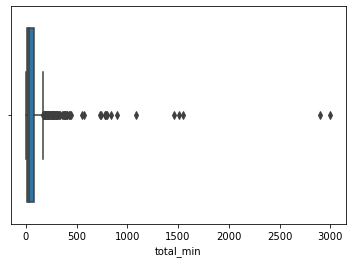

In [347]:
sns.boxplot(x=df_recipe_final['total_min'])

#### Let`s remove all recipes with less than 5 mins and more than 150 mins.

In [348]:
more_5 = df_recipe_final['total_min'] >= 5
less_200 = df_recipe_final['total_min'] < 150
df_result = df_recipe_final[more_5& less_200]
df_result.shape

(652, 12)

<AxesSubplot:xlabel='total_min'>

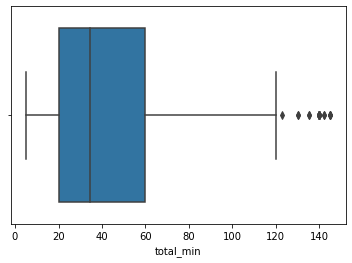

In [349]:
sns.boxplot(x=df_result['total_min'])

In [350]:
df_result.shape

(652, 12)

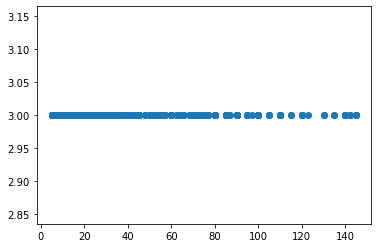

In [388]:
calories = df_result['calories'] < 600
df_ml = df_result[calories]
df_ml
plt.scatter(df_ml['total_min'], df_ml['rating_outOf_5_x'])

We cannot differentiate clusters in this

In [375]:
k_range = range(1, 10)
sse = []
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(df_ml[['total_min', 'calories', 'protein', 'carbo']])
    sse.append(km.inertia_)

In [376]:
sse

[12979927.621503893,
 4558452.259660055,
 2521213.7547752275,
 1831529.6881214085,
 1467029.1177798624,
 1248633.447496981,
 1102354.3131976614,
 965476.7295726135,
 862799.5571411378]

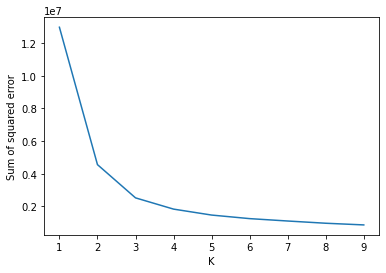

In [377]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_range, sse)

In [379]:
X_km = df_ml[['total_min', 'calories', 'protein', 'carbo']].copy()

In [380]:
km = KMeans(n_clusters=3)

In [381]:
km.fit(X_km)

KMeans(n_clusters=3)

In [382]:
centers = pd.DataFrame(km.cluster_centers_, columns=X_km.columns)
centers

,total_min,calories,protein,carbo
0,47.547325,232.800741,13.766626,28.240535
1,51.581818,410.431697,24.220424,47.226121
2,30.136170,85.638383,3.821447,13.544851


In [383]:
X_km['cluster'] = km.labels_
X_km

,total_min,calories,protein,carbo,cluster
1,72,141.01,5.70,23.75,2
2,18,137.06,4.90,26.88,2
3,10,81.70,1.77,18.17,2
4,15,201.23,1.38,36.63,0
5,100,66.03,3.38,8.04,2
...,...,...,...,...,...
872,20,200.63,6.29,29.24,0
873,25,270.50,6.57,30.14,0
874,15,308.10,9.13,29.91,0
876,25,418.73,23.04,60.78,1


<AxesSubplot:xlabel='total_min', ylabel='calories'>

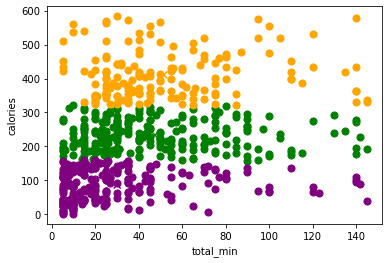

In [386]:
ax = X_km[X_km['cluster']==0].plot(kind='scatter', x='total_min', y='calories', s=50, c='green', sharex=False)
X_km[X_km['cluster']==1].plot(kind='scatter',x='total_min',y='calories',s=50, c='orange', sharex=False, ax = ax)
X_km[X_km['cluster']==2].plot(kind='scatter',x='total_min',y='calories',s=50, c='purple', sharex=False, ax = ax)

centers.plot(kind = 'scatter', x='total_min', y='calories', c=['green','orange','purple'], s=50, marker='x', sharex=False, ax=ax)